## 0. Veri Setinin Hazırlanması

In [1]:
# Gerekli kütüphaneleri yükleyelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

warnings.filterwarnings("ignore")

# Veri setini doğru yoldan yükle
df = pd.read_csv('/kaggle/input/electric-vhicule-population-data/Electric_Vehicle_Population_Data.csv')

# Veri setinin bir kopyasını alalım
df_original = df.copy()

# Veri setinin bir kopyasını alalım
df_original = df.copy()

# Veri setinin genel bilgileri
print("Veri setinin ilk 5 satırı:")
print(df.head())

print("\nVeri setinin boyutu:")
print(df.shape)  # (satır, sütun)

print("\nVeri seti hakkında genel bilgiler:")
df.info()

print("\nVeri setindeki sütunların veri tipleri:")
print(df.dtypes)

Veri setinin ilk 5 satırı:
   VIN (1-10)    County       City State  Postal Code  Model Year       Make  \
0  JTMAB3FV3P    Kitsap    Seabeck    WA      98380.0        2023     TOYOTA   
1  1N4AZ1CP6J    Kitsap  Bremerton    WA      98312.0        2018     NISSAN   
2  5YJ3E1EA4L      King    Seattle    WA      98101.0        2020      TESLA   
3  1N4AZ0CP8E      King    Seattle    WA      98125.0        2014     NISSAN   
4  1G1FX6S00H  Thurston       Yelm    WA      98597.0        2017  CHEVROLET   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        LEAF          Battery Electric Vehicle (BEV)   
2     MODEL 3          Battery Electric Vehicle (BEV)   
3        LEAF          Battery Electric Vehicle (BEV)   
4     BOLT EV          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible            42.0   
1      

## 1. Veriye İlk Bakış

In [2]:


# Kategorik ve sayısal sütunları ayıralım
categorical_features = [col for col in df.columns if df[col].dtype == 'object']
numerical_features = [col for col in df.columns if df[col].dtype != 'object']

print("\nKategorik Değişkenler:")
print(categorical_features)

print("\nSayısal Değişkenler:")
print(numerical_features)

# Betimsel istatistikler (sayısal sütunlar için)
print("\nBetimsel İstatistikler:")
print(df.describe().T)

# Eksik değerlerin ilk kontrolü
print("\nEksik veri sayısı (her sütun için):")
print(df.isnull().sum())



Kategorik Değişkenler:
['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']

Sayısal Değişkenler:
['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

Betimsel İstatistikler:
                         count          mean           std           min  \
Postal Code           205436.0  9.817797e+04  2.419037e+03  1.731000e+03   
Model Year            205439.0  2.020960e+03  2.989059e+00  1.997000e+03   
Electric Range        205431.0  5.216434e+01  8.807586e+01  0.000000e+00   
Base MSRP             205431.0  9.226705e+02  7.761754e+03  0.000000e+00   
Legislative District  204997.0  2.897085e+01  1.491005e+01  1.000000e+00   
DOL Vehicle ID        205439.0  2.277156e+08  7.205737e+07  4.469000e+03   
2020 Census Tract     205436.0  5.297704e+10  1.588435e+09  1.001020e+09   

                   

## 2. Eksik Verilerin Analizi

## 2.1 Eksik Verilerin Gözlemlenmesi


Toplam eksik veri sayısı:
482


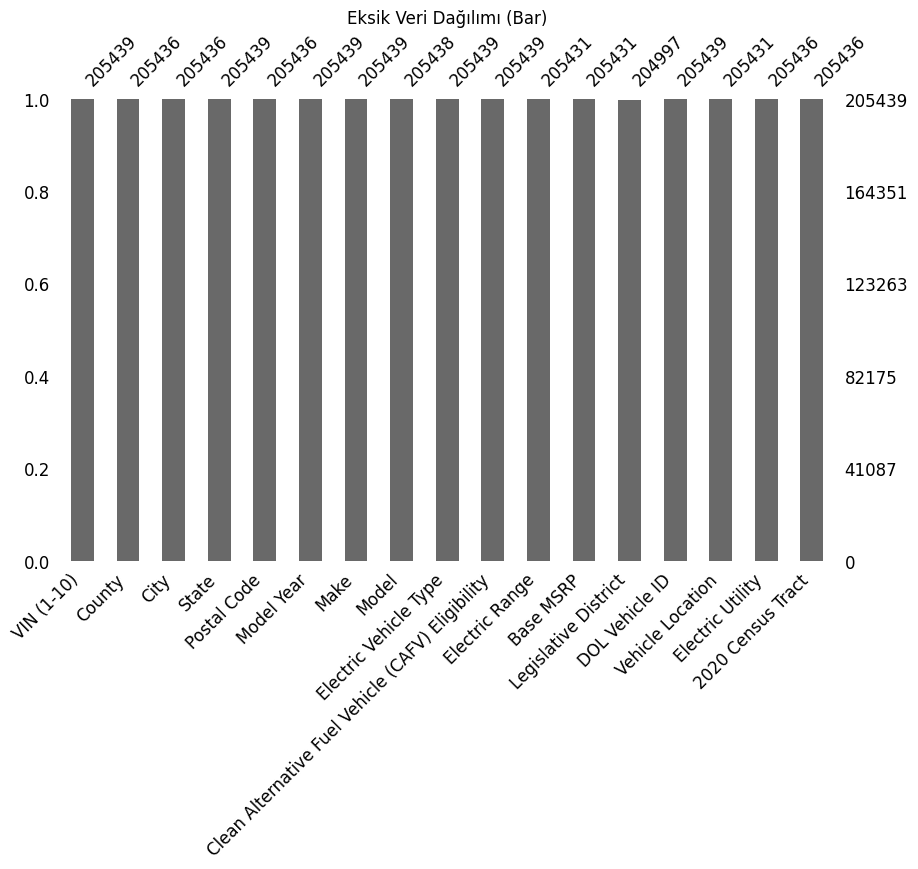

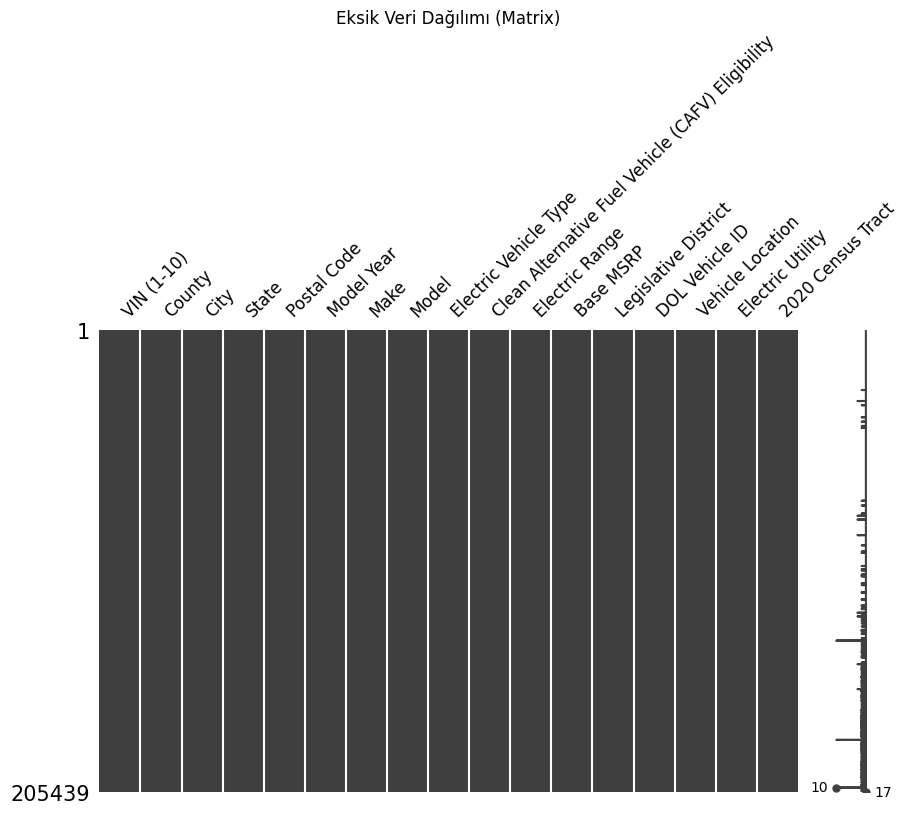

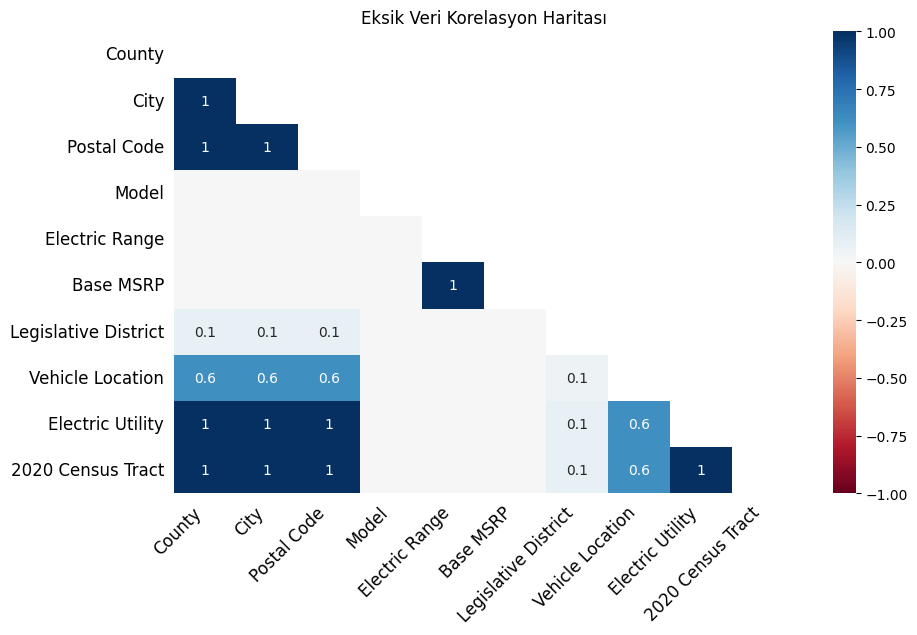

In [3]:
# Eksik veri analizi
print("\nToplam eksik veri sayısı:")
print(df.isnull().sum().sum())

# Eksik veri görselleştirme
msno.bar(df, figsize=(10, 6), fontsize=12)
plt.title("Eksik Veri Dağılımı (Bar)")
plt.show()

msno.matrix(df, figsize=(10, 6), fontsize=12)
plt.title("Eksik Veri Dağılımı (Matrix)")
plt.show()

msno.heatmap(df, figsize=(10, 6), fontsize=12)
plt.title("Eksik Veri Korelasyon Haritası")
plt.show()


## 2.2 Yöntem 1: Eksik Verilerin Silinmesi

In [4]:
# Eksik verileri olan kayıtların silinmesi
df_dropped = df.dropna()

print(f"\nEksik veriler silindikten sonra veri boyutu: {df_dropped.shape}")



Eksik veriler silindikten sonra veri boyutu: (204983, 17)


## 2.3 Yöntem 2: Eksik Verilerin Doldurulması

In [5]:
# Sayısal değişkenlerin medyan ile doldurulması
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

# Kategorik değişkenlerin mod ile doldurulması
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])

print("\nEksik veri doldurma işlemi sonrası eksik veri sayısı:")
print(df.isnull().sum())



Eksik veri doldurma işlemi sonrası eksik veri sayısı:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int

## 3. Kategorik Değişken Analizi

## 3.1 Kategorik Değişken İşlemleri

In [6]:
# Kategorik değişkenlerin dağılımı
for col in categorical_features:
    print(f"\n{col} değişkeninin dağılımı:")
    print(df[col].value_counts())



VIN (1-10) değişkeninin dağılımı:
VIN (1-10)
7SAYGDEE6P    1221
7SAYGDEE7P    1217
7SAYGDEEXP    1181
7SAYGDEE5P    1176
7SAYGDEE8P    1174
              ... 
WBA13AG06P       1
KNDC34LB8P       1
WA1DCBGE7R       1
WP1AE2AY2L       1
7JRH60FU9P       1
Name: count, Length: 12140, dtype: int64

County değişkeninin dağılımı:
County
King          105240
Snohomish      24721
Pierce         16197
Clark          12231
Thurston        7526
               ...  
New Castle         1
Atlantic           1
Santa Cruz         1
Sarasota           1
Anchorage          1
Name: count, Length: 205, dtype: int64

City değişkeninin dağılımı:
City
Seattle        33331
Bellevue       10235
Redmond         7341
Vancouver       7286
Bothell         6769
               ...  
Enid               1
Lansing            1
Winter Park        1
Springville        1
Henderson          1
Name: count, Length: 770, dtype: int64

State değişkeninin dağılımı:
State
WA    204997
CA       116
VA        58
MD        32
TX  

## 4. Sürekli Değişken Analizi

## 4.1 Sürekli Değişkenlerin İncelenmesi

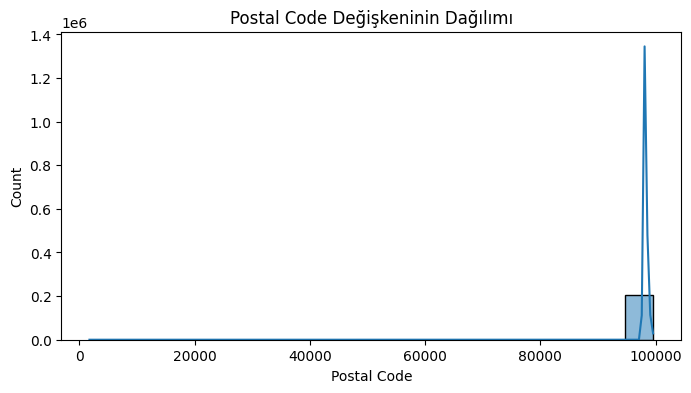

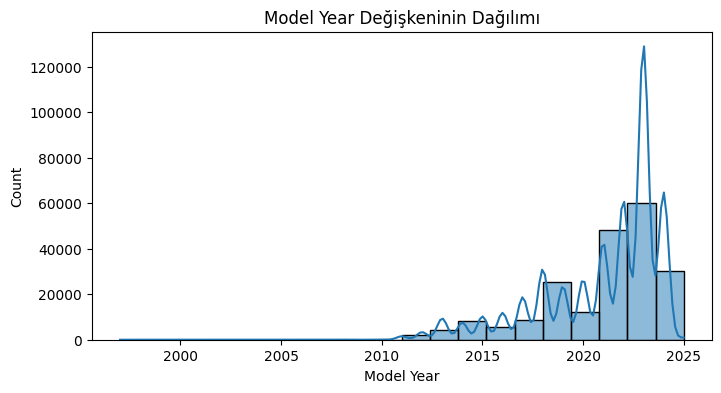

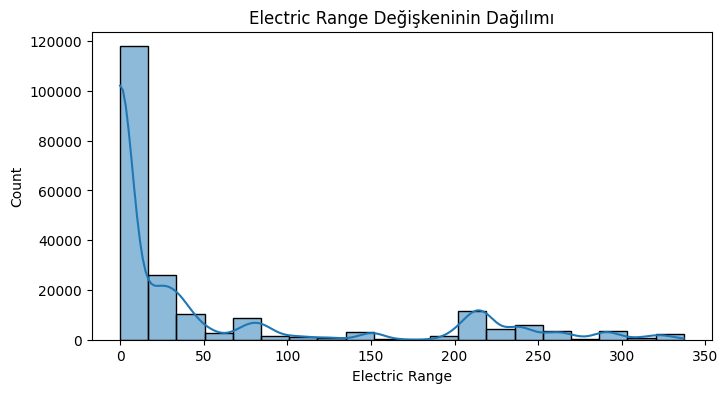

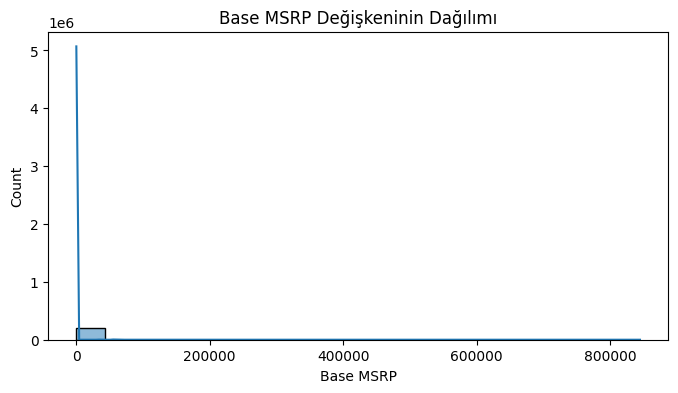

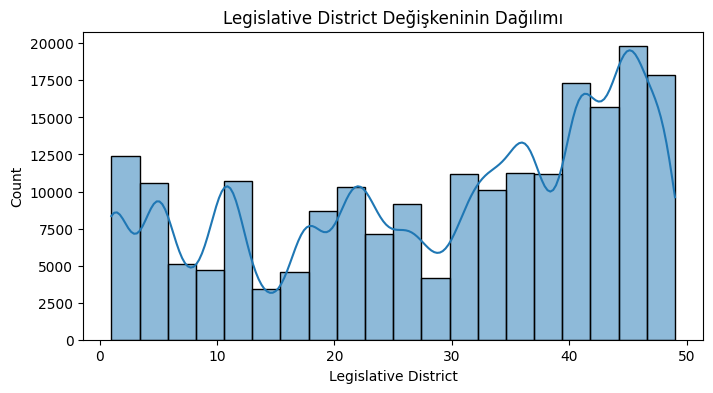

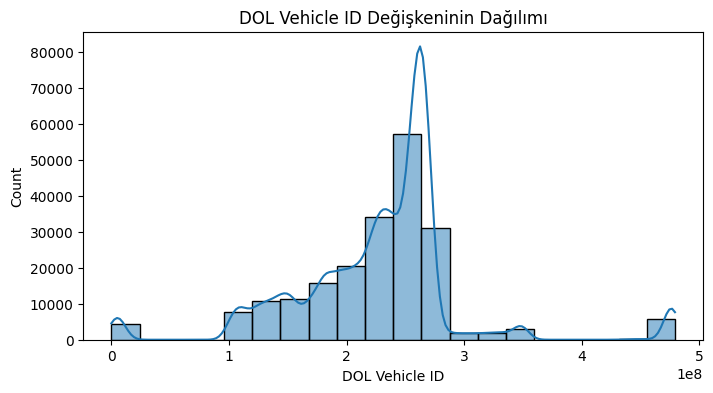

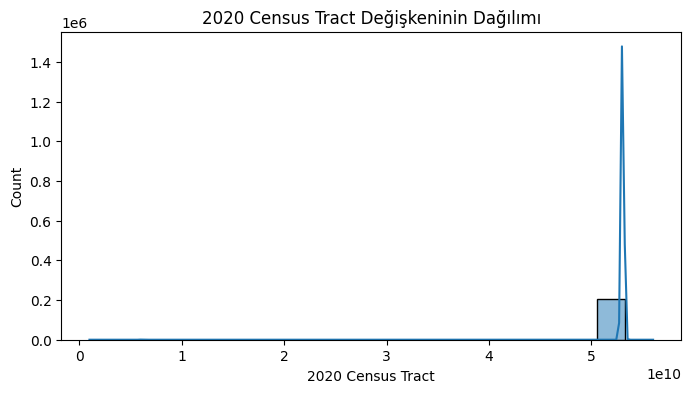

In [7]:
# Sürekli değişkenlerin histogramları
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"{col} Değişkeninin Dağılımı")
    plt.show()


## 5. Aykırı Değer Analizi

## 5.1 Aykırı Gözlemlerin Silinmesi

In [8]:
# IQR ile aykırı değer tespiti
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerleri filtreleyelim
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("\nAykırı değerler silindikten sonra veri boyutu:")
print(df.shape)



Aykırı değerler silindikten sonra veri boyutu:
(147840, 17)


## 6. Feature Engineering

In [9]:
# Örneğin: Fiyat aralığına göre yeni bir kategori oluşturma
df['Price_Category'] = pd.cut(df['Base MSRP'], bins=[0, 30000, 60000, np.inf], labels=['Low', 'Medium', 'High'])

print("\nYeni türetilen Price_Category değişkeninin dağılımı:")
print(df['Price_Category'].value_counts())



Yeni türetilen Price_Category değişkeninin dağılımı:
Price_Category
Low       0
Medium    0
High      0
Name: count, dtype: int64


## 6.1 Mevcut Özelliklerden Yeni Özellikler Türetme

Örnek 1: Sayısal bir özelliği kategorilere ayırma


Range_Category değişkeninin dağılımı:
Range_Category
Short     39097
Medium      830
Long          0
Ultra         0
Name: count, dtype: int64


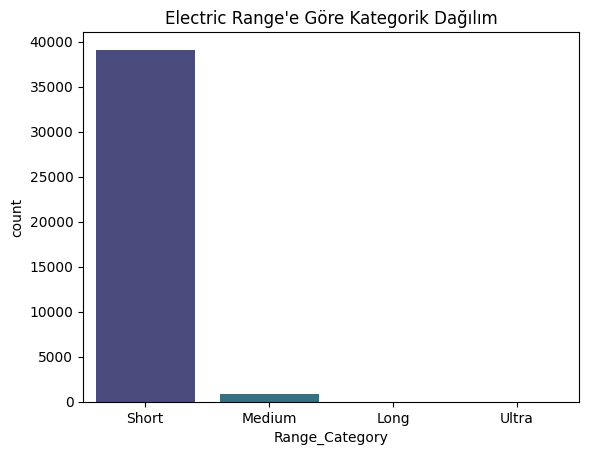

In [10]:
# "Electric Range" değişkenini gruplara ayırarak yeni bir kategorik değişken türetelim
df['Range_Category'] = pd.cut(df['Electric Range'], 
                               bins=[0, 100, 300, 500, np.inf], 
                               labels=['Short', 'Medium', 'Long', 'Ultra'])

print("\nRange_Category değişkeninin dağılımı:")
print(df['Range_Category'].value_counts())

# Görselleştirelim
sns.countplot(x='Range_Category', data=df, palette='viridis')
plt.title("Electric Range'e Göre Kategorik Dağılım")
plt.show()


Örnek 2: İki sütun arasındaki farkı hesaplama
Araçların MSRP değerinden başka bir sayısal değeri çıkararak yeni bir özellik oluşturabiliriz. Örneğin, MSRP'den 2020 Census Tract'ı çıkaralım:


Price_vs_Census değişkeninin ilk 5 satırı:
0    -5.303509e+10
6    -5.303509e+10
7    -5.306105e+10
11   -5.306701e+10
14   -5.303300e+10
Name: Price_vs_Census, dtype: float64


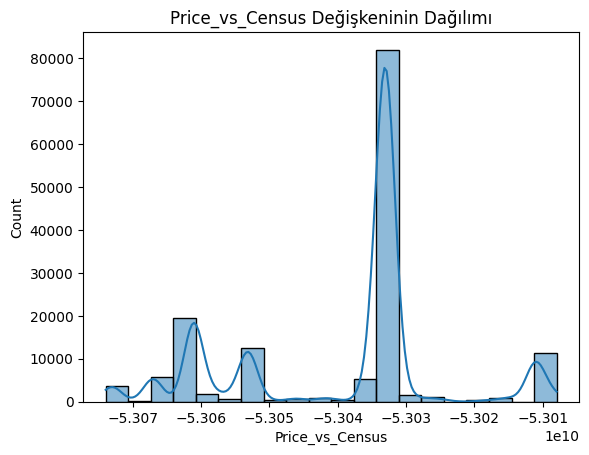

In [11]:
df['Price_vs_Census'] = df['Base MSRP'] - df['2020 Census Tract']

print("\nPrice_vs_Census değişkeninin ilk 5 satırı:")
print(df['Price_vs_Census'].head())

# Görselleştirme
sns.histplot(df['Price_vs_Census'], kde=True, bins=20)
plt.title("Price_vs_Census Değişkeninin Dağılımı")
plt.show()


Örnek 3: Ortalama üzerinden sapma (Deviation from Mean)
Bir değişkenin her bir gözleminin ortalamadan ne kadar sapma gösterdiğini hesaplayabiliriz:


In [12]:
df['MSRP_Deviation'] = df['Base MSRP'] - df['Base MSRP'].mean()

print("\nMSRP_Deviation değişkeninin betimsel istatistikleri:")
print(df['MSRP_Deviation'].describe())



MSRP_Deviation değişkeninin betimsel istatistikleri:
count    147840.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: MSRP_Deviation, dtype: float64


## 6.2 Kategorik Değişkenleri Sayısallaştırma

Örnek 1: Label Encoding
Kategorik bir değişkeni sayısal değerlere dönüştürmek için Label Encoding kullanabiliriz:

In [13]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding işlemi
encoder = LabelEncoder()
df['Vehicle_Type_Encoded'] = encoder.fit_transform(df['Electric Vehicle Type'])

print("\nElectric Vehicle Type için Label Encoding sonrası değerler:")
print(df[['Electric Vehicle Type', 'Vehicle_Type_Encoded']].head())



Electric Vehicle Type için Label Encoding sonrası değerler:
                     Electric Vehicle Type  Vehicle_Type_Encoded
0   Plug-in Hybrid Electric Vehicle (PHEV)                     1
6   Plug-in Hybrid Electric Vehicle (PHEV)                     1
7           Battery Electric Vehicle (BEV)                     0
11          Battery Electric Vehicle (BEV)                     0
14  Plug-in Hybrid Electric Vehicle (PHEV)                     1


Örnek 2: One-Hot Encoding
Her bir kategori için ayrı sütun oluşturabiliriz:

In [14]:
df_encoded = pd.get_dummies(df, columns=['Electric Vehicle Type'], drop_first=True)

print("\nOne-Hot Encoding sonrası ilk 5 satır:")
print(df_encoded.head())



One-Hot Encoding sonrası ilk 5 satır:
    VIN (1-10)     County       City State  Postal Code  Model Year     Make  \
0   JTMAB3FV3P     Kitsap    Seabeck    WA      98380.0        2023   TOYOTA   
6   KM8S6DA23N     Kitsap    Poulsbo    WA      98370.0        2022  HYUNDAI   
7   7FCTGAAA1P  Snohomish  Arlington    WA      98223.0        2023   RIVIAN   
11  1FADP3R40D   Thurston   Tumwater    WA      98501.0        2013     FORD   
14  WAUSPBFF2H       King    Seattle    WA      98117.0        2017     AUDI   

         Model  Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0   RAV4 PRIME            Clean Alternative Fuel Vehicle Eligible   
6     SANTA FE            Clean Alternative Fuel Vehicle Eligible   
7          R1T  Eligibility unknown as battery range has not b...   
11       FOCUS            Clean Alternative Fuel Vehicle Eligible   
14          A3              Not eligible due to low battery range   

    Electric Range  ...  DOL Vehicle ID                 Vehicle L

## 6.3 Zaman Verileri ile Çalışma

Eğer veri setinde tarih içeren sütunlar varsa, bu sütunlardan yıl, ay, hafta, vb. türetebiliriz.

In [15]:
# Örnek: Model Year'ı tarih olarak yorumlayıp yeni bir özellik türetelim
df['Age_of_Car'] = 2024 - df['Model Year']

print("\nAraç yaşı (Age_of_Car) değişkeninin ilk 5 satırı:")
print(df[['Model Year', 'Age_of_Car']].head())



Araç yaşı (Age_of_Car) değişkeninin ilk 5 satırı:
    Model Year  Age_of_Car
0         2023           1
6         2022           2
7         2023           1
11        2013          11
14        2017           7


## 6.4 Araç Yaşı (Model Year) Üzerinden Yeni Bir Değişken

Elektrikli araçların ne kadar eski olduğunu hesaplayabiliriz.


Araç yaş gruplarının dağılımı:
Age_Group
New        103501
Mid-Age     13089
Old          2670
Name: count, dtype: int64


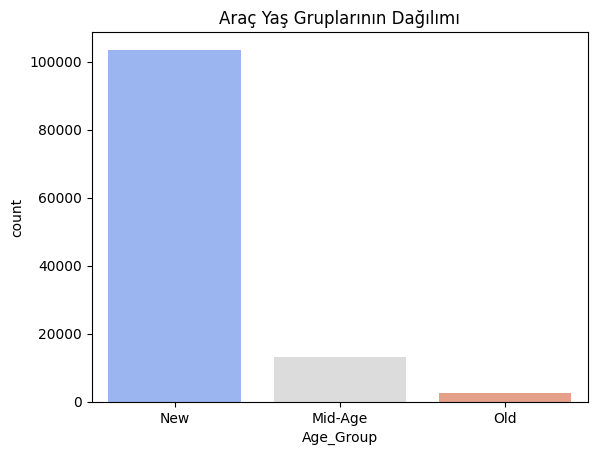

In [16]:
# Araç yaşını hesapla
df['Vehicle_Age'] = 2024 - df['Model Year']

# Araç yaşına göre gruplandırma (Yeni, Orta, Eski)
df['Age_Group'] = pd.cut(df['Vehicle_Age'], bins=[0, 5, 10, np.inf], labels=['New', 'Mid-Age', 'Old'])

print("\nAraç yaş gruplarının dağılımı:")
print(df['Age_Group'].value_counts())

# Görselleştirme
sns.countplot(x='Age_Group', data=df, palette='coolwarm')
plt.title("Araç Yaş Gruplarının Dağılımı")
plt.show()


## 6.5 Elektrik Menziline Göre Kategoriler

"Electric Range" değişkenini menzil gruplarına bölelim


Menzil gruplarının dağılımı:
Range_Group
Short     39097
Medium      830
Long          0
Ultra         0
Name: count, dtype: int64


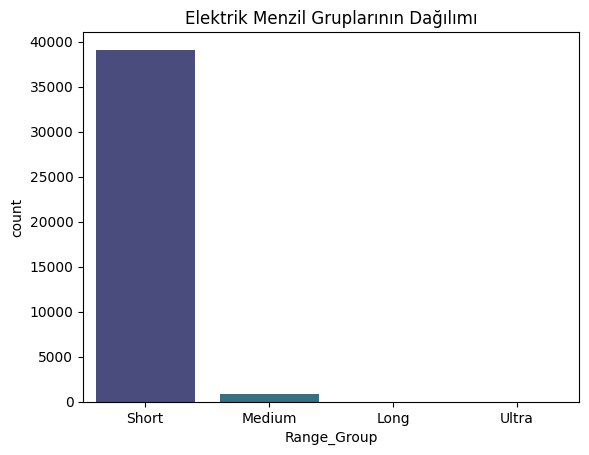

In [17]:
# Menzil grupları oluştur
df['Range_Group'] = pd.cut(df['Electric Range'], bins=[0, 100, 300, 500, np.inf], labels=['Short', 'Medium', 'Long', 'Ultra'])

print("\nMenzil gruplarının dağılımı:")
print(df['Range_Group'].value_counts())

# Görselleştirme
sns.countplot(x='Range_Group', data=df, palette='viridis')
plt.title("Elektrik Menzil Gruplarının Dağılımı")
plt.show()


## 6.6 Elektrik Menzil ve Fiyat Oranı


Fiyat / Menzil oranının ilk 5 satırı:
    Base MSRP  Electric Range  Price_Per_Range
0         0.0            42.0              0.0
6         0.0            31.0              0.0
7         0.0             0.0              NaN
11        0.0            76.0              0.0
14        0.0            16.0              0.0


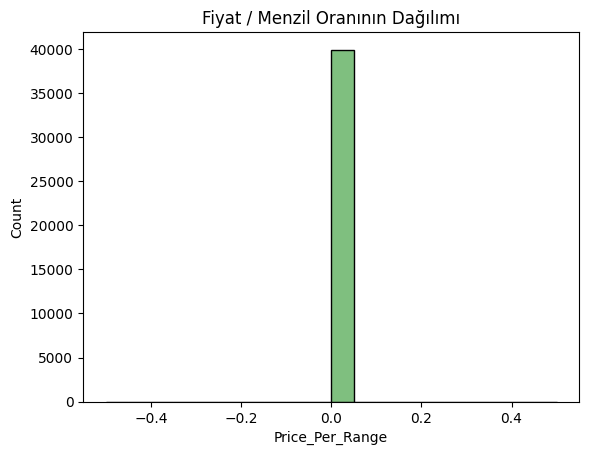

In [18]:
# Fiyat / Menzil oranı
df['Price_Per_Range'] = df['Base MSRP'] / df['Electric Range']

print("\nFiyat / Menzil oranının ilk 5 satırı:")
print(df[['Base MSRP', 'Electric Range', 'Price_Per_Range']].head())

# Görselleştirme
sns.histplot(df['Price_Per_Range'], kde=True, bins=20, color='green')
plt.title("Fiyat / Menzil Oranının Dağılımı")
plt.show()
